In [1]:
%load_ext autoreload
%autoreload 2

import perfplot
import numpy as np
from psfmodels.cuvec import vectorial_psf as cu_vpsf
from psfmodels import vectorial_psf as c_vpsf
from microscPSF.microscPSF import gLXYZFocalScan

In [2]:

zrange = 3
dxy = 0.05
wvl = 0.550

sf = 3
params = {
    'NA': 1.45,
    'ti0' : 190,
    'ni0' : 1.518,
    'ni' : 1.518,
    'tg0' : 170,
    'tg' : 170,
    'ng0' : 1.5150,
    'ng' : 1.5150,
    'ns' : 1.515,
    'M' : 1,
    'NA' : 1.4500,
    'zd0': 200.0 * 1.0e+3
}

def microscpsf(nx):
    zv = np.linspace(-zrange/2, zrange/2, nx//2)
    return gLXYZFocalScan(params, dxy, nx, zv, wvl=wvl).shape

def cuda_vec(nx):
    zv = np.linspace(-zrange/2, zrange/2, nx//2)
    return cu_vpsf(zv, nx=nx, dxy=dxy, params=params, wvl=wvl).shape

def c_vec(nx):
    zv = np.linspace(-zrange/2, zrange/2, nx//2)
    return c_vpsf(zv, nx=nx, dxy=dxy, params=params, wvl=wvl).shape



  0%|          | 0/5 [00:00<?, ?it/s]


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [00:01<00:02,  1.03s/it]


 67%|██████▋   | 2/3 [00:02<00:01,  1.02s/it]


100%|██████████| 3/3 [00:02<00:00,  1.00it/s]


 20%|██        | 1/5 [00:03<00:12,  3.04s/it]


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [00:01<00:02,  1.03s/it]


 67%|██████▋   | 2/3 [00:02<00:01,  1.02s/it]


100%|██████████| 3/3 [00:03<00:00,  1.01s/it]


 40%|████      | 2/5 [00:06<00:09,  3.05s/it]


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [00:01<00:02,  1.06s/it]


 67%|██████▋   | 2/3 [00:02<00:01,  1.07s/it]


100%|██████████| 3/3 [00:03<00:00,  1.16s/it]


 60%|██████    | 3/5 [00:09<00:06,  3.20s/it]


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [00:01<00:03,  1.71s/it]


 67%|██████▋   | 2/3 [00:05<00:02,  2.44s/it]


100%|██████████| 3/3 [00:49<00:00, 16.36s/it]


 80%|████████  | 4/5 [00:59<00:17, 17.22s/it]


  0%|          | 0/3 [00:00<?,

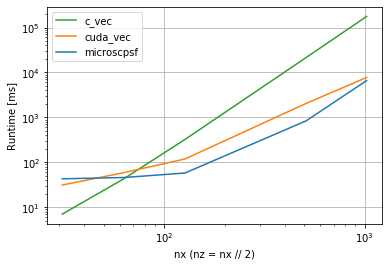

In [4]:
bench = perfplot.bench(
    setup=lambda n: n,
    kernels=[microscpsf, cuda_vec, c_vec],
    n_range=[31, 63, 127, 511, 1023],
    logx=True,
    logy=True,
    xlabel='nx (nz = nx // 2)'
)
bench.show()